In [2]:
from keras.datasets import mnist
import numpy as np

#podział na zbiór testowy i uczący
train, test = mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
"""
Zadanie 7.2. Znalezienie optymalnej liczby warstw
Stosując Listing 7.1 napisz skrypt, który pozwoli na znalezienie optymalnej liczby
warstw. Jako optymalną rozumiemy liczbę, przy której jakość działania modelu będzie
najlepsza, a liczba warstw nie będzie za duża.
"""

In [ ]:
#funkcja budująca sieć konwolusyjną
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam


def buildConvo(layer_num=1):
    #papametry sieci konwolucyjnej
    class_cnt = np.unique(y_train).shape[0]
    filter_cnt = 32
    neuron_cnt = 32
    learning_rate = 0.0001
    act_func = 'relu'
    kernel_size = (3,3)
    model = Sequential()
    conv_rule = 'same'
    pooling_size=(2,2)
    
    #dodanie warstw do sieci konwolucyjnej
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    for a in range(layer_num):
      model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    
    model.add(Flatten())
    model.add(Dense(class_cnt, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')
    return model


In [ ]:
#sprawdzenie najlepszej ilości warstw w sieci konwolucyjnej
from keras.wrappers.scikit_learn import KerasClassifier #depricated
from sklearn.model_selection import GridSearchCV

keras_classifier = KerasClassifier(buildConvo)
param_distribs = {
    'layer_num':[0,1,2,3,4,5]
}

grid_search_cv = GridSearchCV(keras_classifier,param_distribs)
grid_result = grid_search_cv.fit(X_train,y_train,epochs=10)
best_params_from_grid = grid_search_cv.best_params_
best_model_from_grid = grid_search_cv.best_estimator_

#najlepsze parametry znalezione
best_params_from_grid

"""
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0038 - accuracy: 0.9987
{'layer_num': 5}
"""

<ipython-input-3-00fc6b5fe9cb>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(buildConvo)


Epoch 1/10
1500/1500 [==============================] - 11s 3ms/step - loss: 1.1206 - accuracy: 0.8974
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2525 - accuracy: 0.9597
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1308 - accuracy: 0.9746
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0770 - accuracy: 0.9822
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9859
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0395 - accuracy: 0.9896
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0305 - accuracy: 0.9919
Epoch 8/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0252 - accuracy: 0.9927
Epoch 9/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 10/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2151

{'layer_num': 5}

### **Wnioski zad. 7.2**
Optymalna liczba warstw dla modelu wyznaczona przy pomocy GridSearch wyniosła 5 warstw ukrytych.

In [ ]:
"""
Zadanie 7.3. Wpływ warstw głosujących
Zbadaj wpływ warstw głosujących. Po każdej warstwie konwolucyjnej dodaj warstwę
głosującą. Porównaj krzywe uczenia uzyskane z zastosowaniem warstw głosujących oraz
bez nich. Przetestuj dwa rodzaje warstw: MaxPooling oraz AveragePooling.
"""

In [3]:
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten,Dense, AveragePooling2D, MaxPooling2D

# bez warstw głowujących
def buildConvoNoPool():
    class_cnt = np.unique(y_train).shape[0]
    filter_cnt = 32
    neuron_cnt = 32
    learning_rate = 0.0001
    act_func = 'relu'
    kernel_size = (3,3)
    model = Sequential()
    conv_rule = 'same'
    pooling_size=(2,2)

    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    
    model.add(Flatten())
    model.add(Dense(class_cnt, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')
    return model

In [4]:
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten,Dense, AveragePooling2D, MaxPooling2D

# z warstwą głosującą MaxPooling
def buildConvoMaxPool():
    class_cnt = np.unique(y_train).shape[0]
    filter_cnt = 32
    neuron_cnt = 32
    learning_rate = 0.0001
    act_func = 'relu'
    kernel_size = (3,3)
    model = Sequential()
    conv_rule = 'same'
    pooling_size=(2,2)

    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    
    model.add(MaxPooling2D(pooling_size))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(MaxPooling2D(pooling_size))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(MaxPooling2D(pooling_size))

    model.add(Flatten())
    model.add(Dense(class_cnt, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')
    return model

In [5]:
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Flatten,Dense, AveragePooling2D, MaxPooling2D

# z warstwą głowującą AveragePooling
def buildConvoAvgPool():
    class_cnt = np.unique(y_train).shape[0]
    filter_cnt = 32
    neuron_cnt = 32
    learning_rate = 0.0001
    act_func = 'relu'
    kernel_size = (3,3)
    model = Sequential()
    conv_rule = 'same'
    pooling_size=(2,2)

    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    
    model.add(AveragePooling2D(pooling_size))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(AveragePooling2D(pooling_size))
    model.add(Conv2D(input_shape = X_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    model.add(AveragePooling2D(pooling_size))

    model.add(Flatten())
    model.add(Dense(class_cnt, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')
    return model

In [11]:
#funkcja rysująca wykres uczenia dla danego modelu
def generateNetworkLearningCurve(model,epchs=10):
  from matplotlib import pyplot as plt
  historia = model.history.history
  floss_train = historia['loss']
  floss_test = historia['val_loss']
  acc_train = historia['accuracy']
  acc_test = historia['val_accuracy']
  fig,ax = plt.subplots(1,2, figsize=(20,10))
  epochs = np.arange(0, epchs)
  ax[0].plot(epochs, floss_train, label='floss_train')
  ax[0].plot(epochs, floss_test, label='floss_test')
  ax[0].set_title('Funkcje strat')
  ax[0].legend()
  ax[1].set_title('Dokladnosci')
  ax[1].plot(epochs, acc_train, label='acc_train')
  ax[1].plot(epochs, acc_test, label='acc_test')
  ax[1].legend()

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1684 - accuracy: 0.9513 - val_loss: 0.0665 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0385 - val_accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0440 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0393 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0490 - val_ac

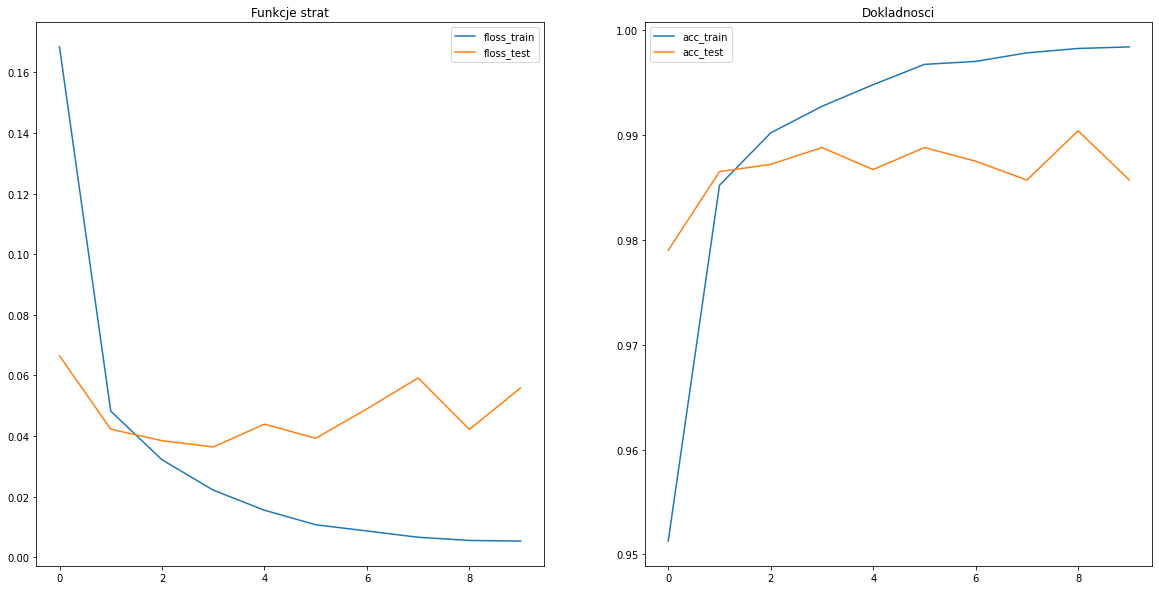

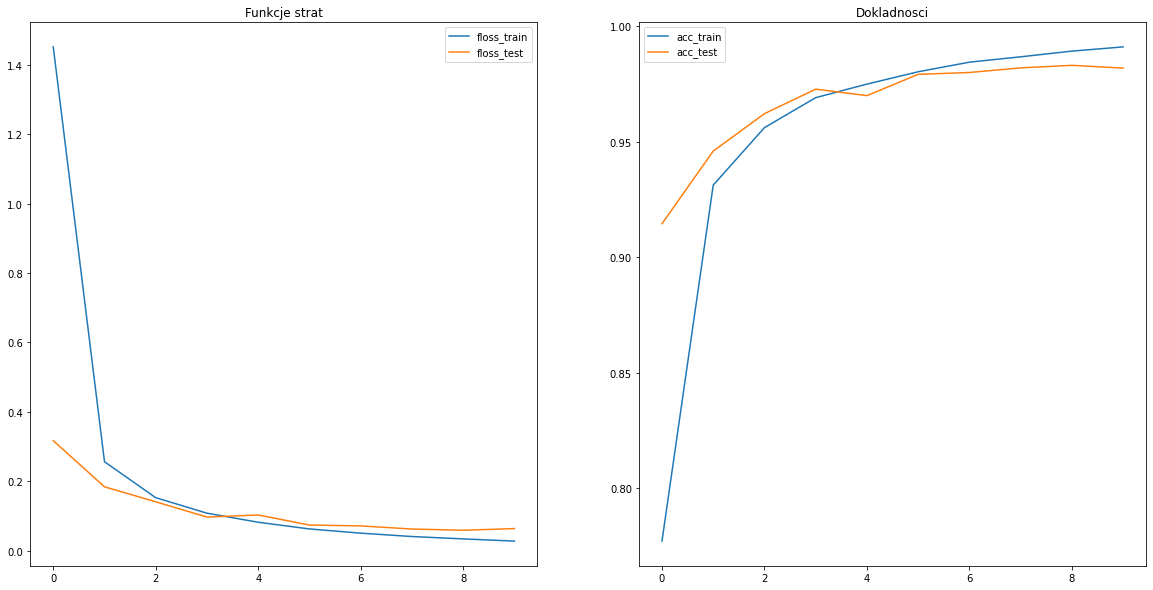

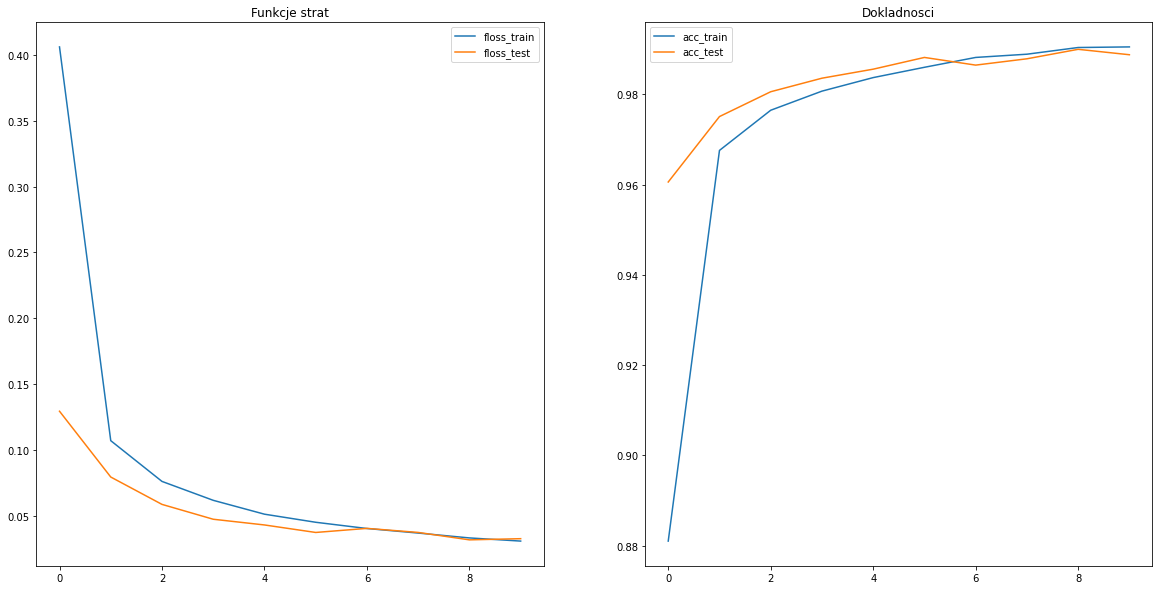

In [13]:
#wytrenowanie modeli
modelNoPool = buildConvoNoPool()
modelMaxPool = buildConvoMaxPool()
modelAvgPool = buildConvoAvgPool()

modelNoPool.fit(X_train,y_train,epochs=10,validation_data=[X_test,y_test])
modelMaxPool.fit(X_train,y_train,epochs=10,validation_data=[X_test,y_test])
modelAvgPool.fit(X_train,y_train,epochs=10,validation_data=[X_test,y_test])


#dodać generowanie wykresów krzywych uczenia
generateNetworkLearningCurve(modelNoPool,10)
generateNetworkLearningCurve(modelMaxPool,10)
generateNetworkLearningCurve(modelAvgPool,10)

### **Wnioski zad. 7.3**
Na podstawie wygenerowanych wykresów można zauważyć, że najbardziej stablilnymi sieciami są sieci w wykorzystaniem AvgPooling oraz MaxPooling w tych przypadkach funkcja strat w przypadku przetrenowania ma tendencję malejącą. Ponadto w zestawieniu funkcji strat dla AvgPooling oraz MaxPooling  lepszą jest AvgPooling, ponieważ zjawisko przetrenowania zachodzi na niższym poziomie niż w przypadku MaxPooling oraz przetrenowanie zachodzi dopiero dla epok wyższych niż 8 (gdzie w kontraście dla Maxpooling przetrenowanie zachodziło już w 3 epoce).

W przypadku zestawienia wykresów funkcji dokładności możemy zaobserwować, że warstwy pooling wpływają pozytywnie na dokładność dla zbioru testowego. Ponadto najlepsze zestawienie dla sieci neuronowej wykorzystuje warstwy AvgPooling, ponieważ zjawisko przetrenowania zachodzi dopiero w 6 epoce i jest mniej odczuwalne niż w przypadku MaxPooling.


In [ ]:
""" (strona 74)
Zadanie 7.4. Utworzenie modelu sieci konwolucyjnej do klasyfikacji zbioru danych
CIFAR10
Załaduj zbiór danych CIFAR10 za pomocą kodu, który przedstawia Listing 7.4. Zbuduj
konwolucyjną sieć neuronową, która pozwala na jego klasyfikację. Znajdź optymalną liczbę
warstw. Wytrenuj sieć o takiej liczbie warstw. Przetestuj działanie sieci na zbiorze testowym.
Wygeneruj macierz pomyłek. Jakie klasy są klasyfikowane najłatwiej, jakie pary klas
są mylone najczęściej?
"""


In [1]:
# załadowanie zbioru danych
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [6]:
#funkcja budująca sieć konwolusyjną
from keras.layers import Conv2D, Flatten, Dense,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam


def buildConvo(layer_num=1):
    #papametry sieci konwolucyjnej
    class_cnt = np.unique(y_train).shape[0]
    filter_cnt = 32
    neuron_cnt = 32
    learning_rate = 0.0001
    act_func = 'relu'
    kernel_size = (3,3)
    model = Sequential()
    conv_rule = 'same'
    pooling_size=(2,2)
    
    #dodanie warstw do sieci konwolucyjnej
    model.add(Conv2D(input_shape = x_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    for a in range(layer_num):
      model.add(Conv2D(input_shape = x_train.shape[1:],filters=filter_cnt,kernel_size = kernel_size,padding = conv_rule, activation = act_func))
    
    model.add(Flatten())
    model.add(Dense(class_cnt, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')
    return model

In [7]:
# wyznaczenie optymalnej ilości warstw
from keras.wrappers.scikit_learn import KerasClassifier #depricated
from sklearn.model_selection import GridSearchCV
import numpy as np

keras_classifier = KerasClassifier(buildConvo)
param_distribs = {
    'layer_num':[0,1,2,3,4,5]
}

grid_search_cv = GridSearchCV(keras_classifier,param_distribs)
grid_result = grid_search_cv.fit(x_train,y_train,epochs=10)
best_params_from_grid = grid_search_cv.best_params_
best_model_from_grid = grid_search_cv.best_estimator_

#najlepsze parametry znalezione
best_params_from_grid

<ipython-input-7-48c397c061eb>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(buildConvo)


Epoch 1/10
1250/1250 [==============================] - 11s 3ms/step - loss: 12.7383 - accuracy: 0.3302
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 3.5345 - accuracy: 0.4566
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9357 - accuracy: 0.5231
Epoch 4/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.4121 - accuracy: 0.5781
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1070 - accuracy: 0.6431
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9268 - accuracy: 0.6934
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7819 - accuracy: 0.7332
Epoch 8/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6561 - accuracy: 0.7762
Epoch 9/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5799 - accuracy: 0.8025
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.394

{'layer_num': 5}

In [ ]:
"""
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0060 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0038 - accuracy: 0.9987
{'layer_num': 5}
"""


In [8]:
# wytrenowanie model z najlepszymi parametrami
best_model=buildConvo(**best_params_from_grid)
best_model.fit(x_train,y_train,epochs=8,validation_data=(x_test,y_test)) #  8 epok to wartość optymalna (na podstawie zadania 7.2 dla sieci o takich samych parametrach)

Epoch 1/8
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6495 - accuracy: 0.4426 - val_loss: 1.3442 - val_accuracy: 0.5229
Epoch 2/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1588 - accuracy: 0.5932 - val_loss: 1.1582 - val_accuracy: 0.5928
Epoch 3/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9465 - accuracy: 0.6749 - val_loss: 1.1277 - val_accuracy: 0.6029
Epoch 4/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7728 - accuracy: 0.7358 - val_loss: 1.1159 - val_accuracy: 0.6199
Epoch 5/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6108 - accuracy: 0.7926 - val_loss: 1.1929 - val_accuracy: 0.6096
Epoch 6/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4633 - accuracy: 0.8445 - val_loss: 1.2980 - val_accuracy: 0.6120
Epoch 7/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3380 - accuracy: 0.8875 - val_loss: 1.4364 - val_accuracy:

In [9]:
# wygenerowanie macierzy pomyłek
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

y_predict = np.argmax(best_model.predict(x_test),axis=1)
print(confusion_matrix(y_test,y_predict))

313/313 [==============================] - 1s 2ms/step
[[696  26  67  28  27   6  16  14  74  46]
 [ 39 738  11  22   5   7  10  10  39 119]
 [107   5 452 101 100  67  93  44  18  13]
 [ 34  20 106 455  67 153  95  44  17   9]
 [ 27   4  98  90 518  44 102 102  10   5]
 [ 17   6 101 239  57 430  44  84  11  11]
 [ 10   6  73  81  53  20 726  20   7   4]
 [ 25   6  59  71  68  67  19 667   0  18]
 [171  42  13  24  16   8  14   7 657  48]
 [ 56 125  21  24   8   7  10  32  38 679]]


In [ ]:
"""
313/313 [==============================] - 1s 2ms/step
[[696  26  67  28  27   6  16  14  74  46]
 [ 39 738  11  22   5   7  10  10  39 119]
 [107   5 452 101 100  67  93  44  18  13]
 [ 34  20 106 455  67 153  95  44  17   9]
 [ 27   4  98  90 518  44 102 102  10   5]
 [ 17   6 101 239  57 430  44  84  11  11]
 [ 10   6  73  81  53  20 726  20   7   4]
 [ 25   6  59  71  68  67  19 667   0  18]
 [171  42  13  24  16   8  14   7 657  48]
 [ 56 125  21  24   8   7  10  32  38 679]]
 """

### **Wnioski zad. 7.4**
Optymalna liczba warstw to 5 warstw ukrytych (na podstawie grid search).

Jakie klasy są klasyfikowane najłatwiej?

Najłatwiej klasyfikowane klasy (kolumny w macierzy pomyłek) to te, których wartości na przekątnej macierzy pomyłek są największe. 
Są to kolejno (licząc od 1 do n):
 - klasa 2 (z wynikiem 738 klasyfikacji)
 - klasa 7 (z wynikiem 726 klasyfikacji)
 - klasa 1 (z wynikiem 696 klasyfikacji)
 - klasa 10 (z wynikiem 679 klasyfikacji)
 - klasa 8 (z wynikiem 667 klasyfikacji) 

Jakie pary klas są mylone najczęściej?

Najbardziej mylone klasy to te, których wartości poza przekątną są największe.
Są to kolejno (licząc od 1 do n):
 - klasa 4 (z wynikiem 239 błędnych klasyfikacji)
 - klasa 1 (z wynikiem 171 błędnych klasyfikacji)
 - klasa 6 (z wynikiem 153 błędnych klasyfikacji)
 - klasa 2 (z wynikiem 125 błędnych klasyfikacji)
 - klasa 10 (z wynikiem 119 błędnych klasyfikacji)

Dodatkowo możemy zaobserwować, że klasa 1, która mimo wysokiej liczby najłatwiejszych klasyfikacji jest także klasą której klasyfikacje są najbardziej mylone.
